In [2]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from matplotlib.patches import Ellipse

import numpy as np
from scipy.special import erfcinv
import scipy.stats as st
from scipy.stats import chi2, multivariate_normal, gamma
from scipy.special import erfcinv, erfinv, erf, erfc
from scipy.linalg import sqrtm, inv

import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git
import sys, os

# Create the two toy chains and the joint chain:
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
path_global = os.path.dirname(path_git)
print('Path to git repo: {}'.format(path_global))

chi2_val = chi2.ppf(0.6827, df=2)

d = 2
L = 3  # Number of vectors
n_samples = int(1e6)

Path to git repo: /home/matias/Documents/PhD/code


# PTE to $N_{\sigma}$

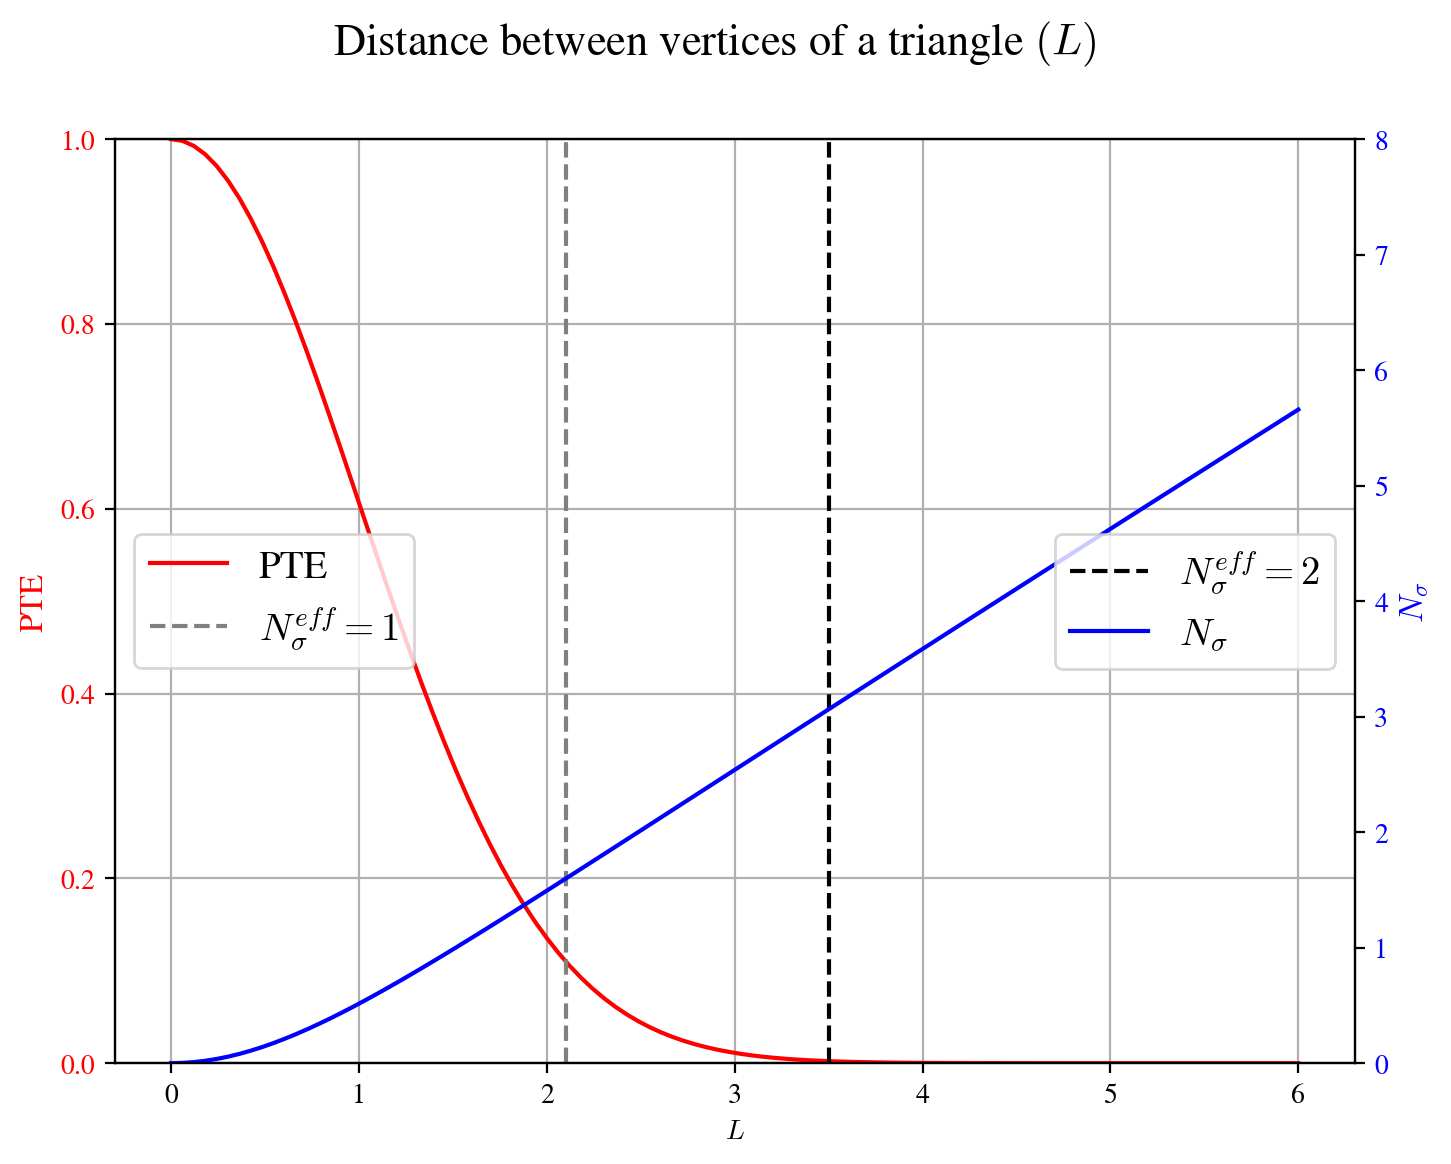

In [3]:
#Sharp triangle
factor = np.linspace(0, 6, 100)
PTE_arr = np.zeros(len(factor))
n_sigma_arr = np.zeros(len(factor))

for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.]) 
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
    
    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE_arr[i] = chi2(d).sf(beta_L)
    n_sigma_arr[i] = np.sqrt(2)*erfcinv(PTE_arr[i])

fig, axes = plt.subplots(1,1, figsize=(8, 6))
fig.suptitle(r'Distance between vertices of a triangle $(L)$'.format(factor[i]), fontsize=16)

ax1 = axes
ax2 = ax1.twinx()

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 8)


ax1.plot(factor, PTE_arr, label='PTE', color='red')
ax1.set_xlabel(r'$L$')
ax1.set_ylabel('PTE', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.vlines(x=2.1, ymin=0, ymax=8, color='gray', linestyle='--',label='$N_\sigma^{eff} = 1$')
ax2.vlines(x=3.5, ymin=0, ymax=8, color='black', linestyle='--',label='$N_\sigma^{eff} = 2$')

ax2.plot(factor, n_sigma_arr, label='$N_\sigma$', color='blue')
ax2.set_ylabel('$N_\sigma$', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='center left', fontsize=14)
ax2.legend(loc='center right', fontsize=14)

ax1.grid()

fig.savefig(os.path.join(path_global, 'multidimensional_qdm_tension_vectors_sweap_cov.png'), dpi=300, bbox_inches='tight')
plt.show()

Que es $N_{\sigma}^{eff}$? Hagamos algunos graficos

In [4]:
import numpy as np
from math import erf, sqrt
from scipy.stats import chi2

def L_iso_from_n(d: int, n: float, sigma2: float = 0.5, gauss_scale: str = '1sigma') -> float:
    """
    Distancia euclídea L entre las medias de dos Gaussianas D-dimensionales
    idénticas e isotrópicas (Sigma = sigma2 * I), tal que sus contornos 
    que en 1D corresponden a ±nσ se 'toquen'.

    Parámetros
    ----------
    d : int
        Dimensión (D).
    n : float
        'Número de sigmas' 1D (es decir, p = erf(n / sqrt(2))).
    sigma2 : float, opcional
        Varianza isotrópica por eje (default 0.5).

    Devuelve
    --------
    L : float
        Distancia euclídea entre medias.
    """


    if gauss_scale == '1sigma':
        # Probabilidad 1D asociada a ±nσ
        p = erf(n / sqrt(2.0)) #is the same, less general
        #p = chi2.cdf(n**2, df=1)  # Cumulative distribution function for chi2Q
    elif gauss_scale == '2sigma':
        p = chi2.cdf(n**2, df=2)  # Cumulative distribution function for chi2

    # Cuantil chi-cuadrado con d grados de libertad
    m2 = chi2.ppf(p, df=d)              # m^2 = χ²_{d,p}
    m  = sqrt(m2)
    # En isotrópico: L = 2 * σ * m, con σ = sqrt(sigma2)
    return 2.0 * sqrt(sigma2) * m

print('--- Using 1sigma scale ---')
for n in [1, 2, 3, 4, 5]:
    print(n, L_iso_from_n(d=2, n=n))   # d=2, sigma^2=0.5

print('--- Using 2sigma scale ---')
for n in [1, 2, 3, 4, 5]:
    print(n, L_iso_from_n(d=2, n=n, gauss_scale='2sigma'))   # d=2, sigma^2=0.5

--- Using 1sigma scale ---
1 2.142778070122352
2 3.515700301858557
3 4.863981513513553
4 6.21834521588094
5 7.5820448992254725
--- Using 2sigma scale ---
1 1.4142135623730951
2 2.8284271247461903
3 4.242640687119287
4 5.656854249492375
5 7.071067811867373


In [5]:
erf(1 / np.sqrt(2.0))

0.6826894921370859

Factor: 0.0, PTE: 1, N_sigma: -0


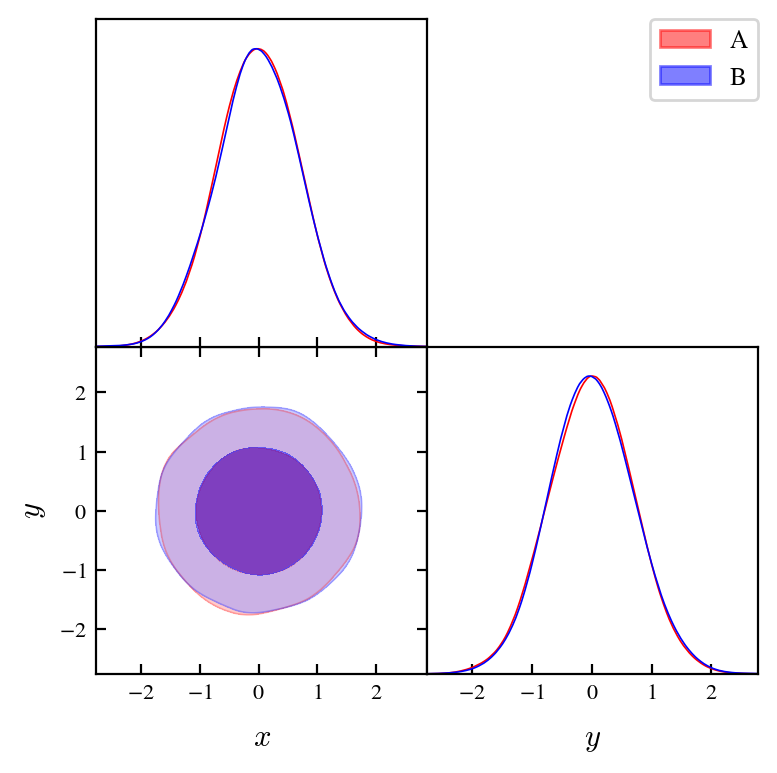

Factor: 2.142778070122352, PTE: 0.101, N_sigma: 1.64


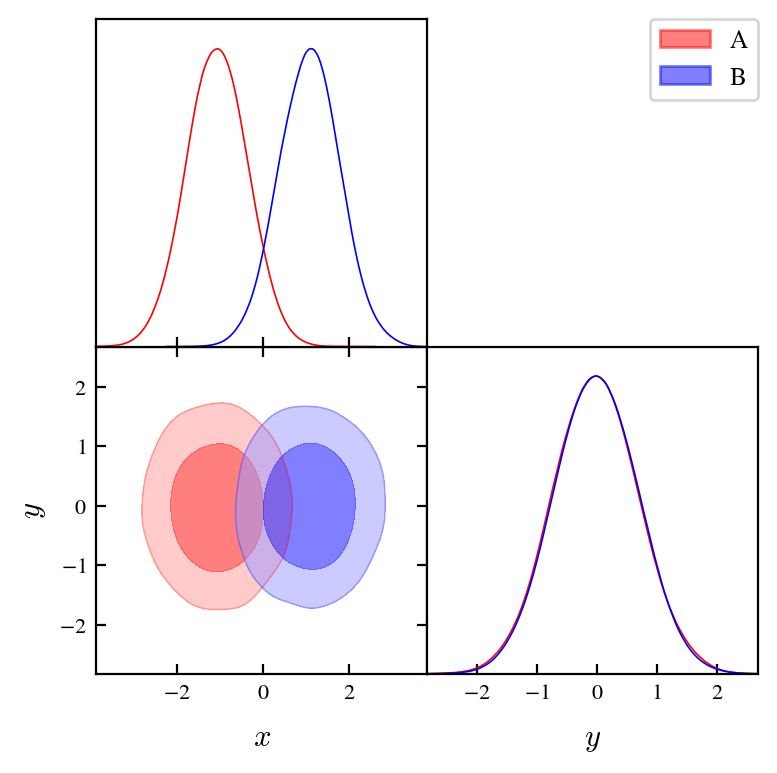

Factor: 3.515700301858557, PTE: 0.00207, N_sigma: 3.08


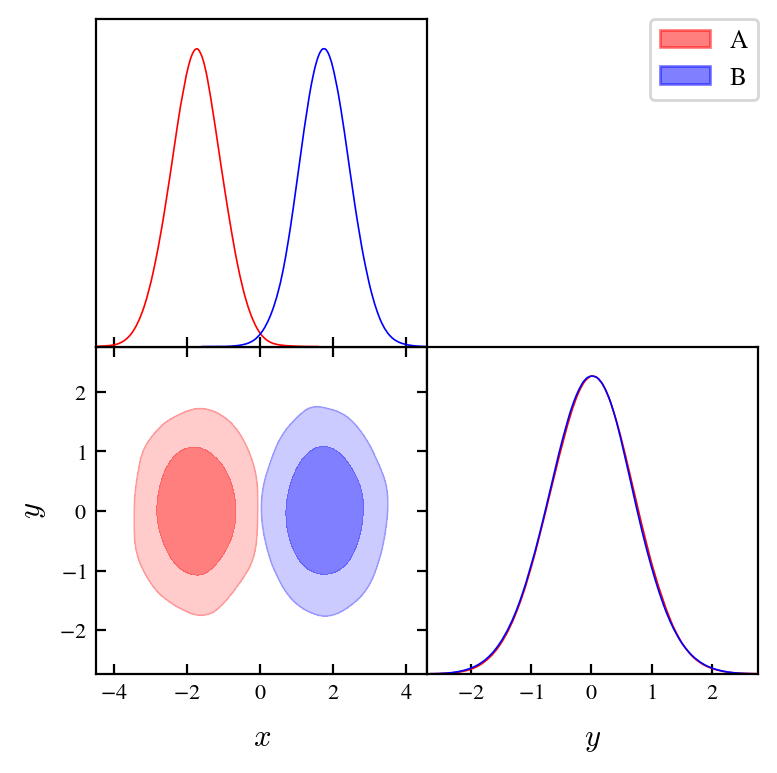

Factor: 4.863981513513553, PTE: 7.29e-06, N_sigma: 4.49


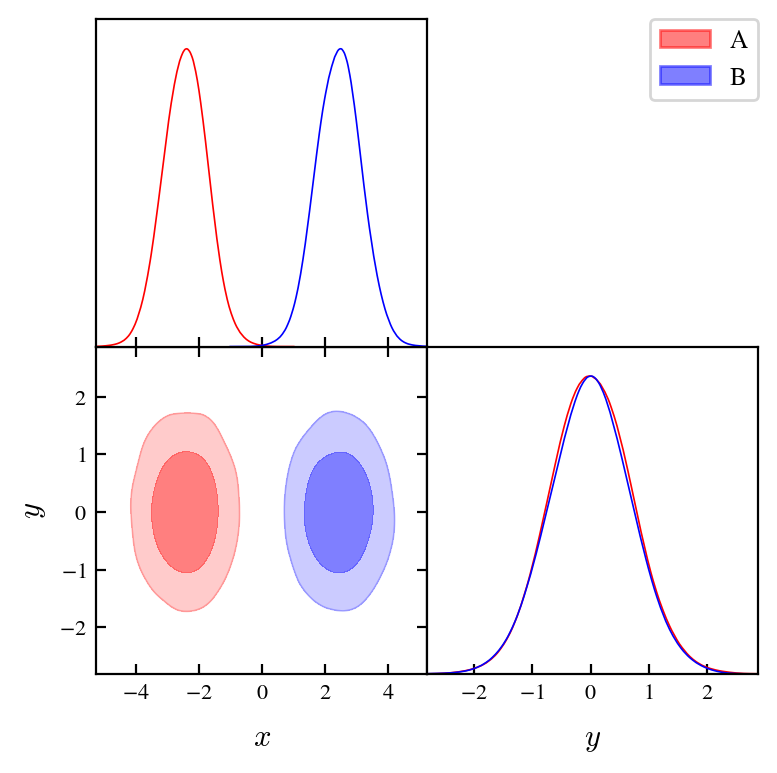

Factor: 6.21834521588094, PTE: 4.01e-09, N_sigma: 5.88


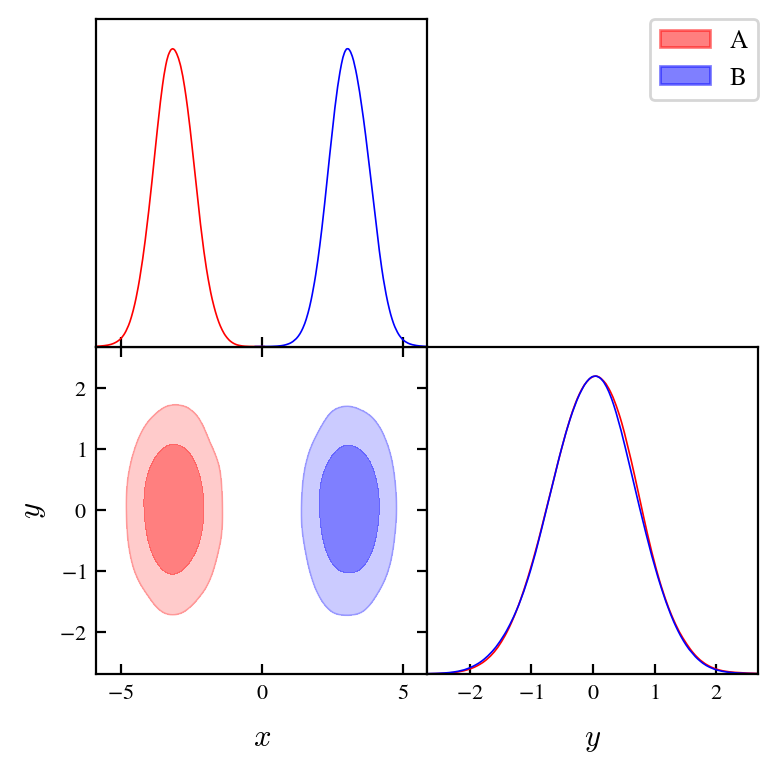

Factor: 7.5820448992254725, PTE: 3.29e-13, N_sigma: 7.28


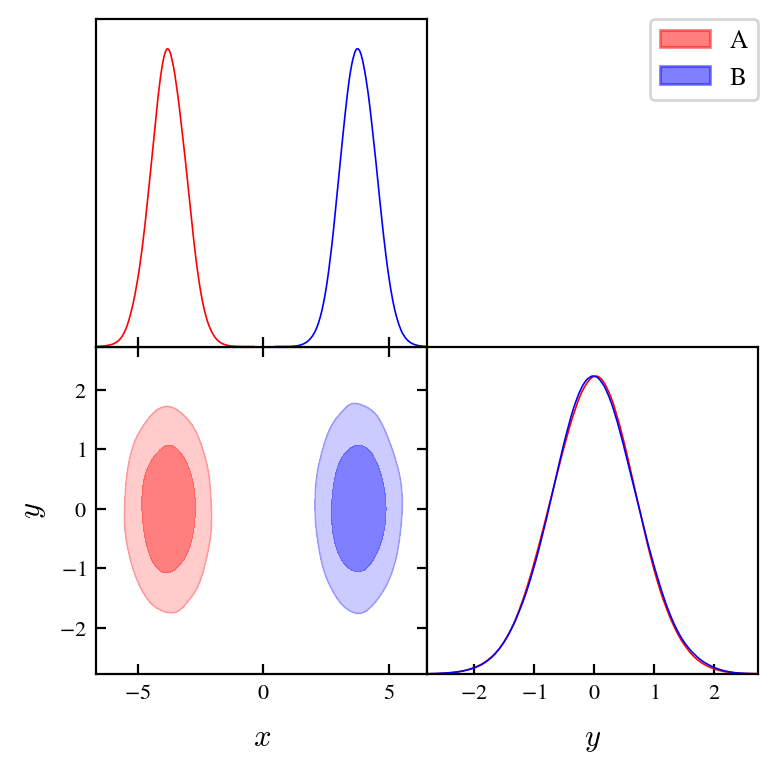

In [6]:
#Sharp triangle

factor = [0., L_iso_from_n(d=2, n=1),
          L_iso_from_n(d=2, n=2), L_iso_from_n(d=2, n=3),
          L_iso_from_n(d=2, n=4), L_iso_from_n(d=2, n=5)]


for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.])
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))

    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE = chi2(d).sf(beta_L)
    n_sigma = np.sqrt(2)*erfcinv(PTE)

    print(f"Factor: {factor[i]}, PTE: {PTE:.3g}, N_sigma: {n_sigma:.3g}")


    names = ['x', 'y']
    labels = ['x', 'y']

    lim_x = np.array([-10, 10])
    lim_y = np.array([-10, 10])

    samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
    samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)

    chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
    chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')

    colors = ['red', 'blue', 'green']

    g = plots.get_subplot_plotter()
    g.triangle_plot([chain_A, chain_B],\
                    filled=True, contour_args={'alpha':0.5},\
                    contour_colors=colors,
                    legend_labels=['A', 'B'])
    #g.add_param_markers({'x':[mean_A[0], mean_B[0], mean_C[0]],
    #                    'y':[mean_A[1], mean_B[1], mean_C[1]],
    #                    },)

    #g.export(os.path.join(path_global, 'multidimensional_qdm_tension_vectors_triangle_L_{:.3g}.png'.format(factor[i])))
    plt.show()

Factor: 0.0, PTE: 1, N_sigma: -0


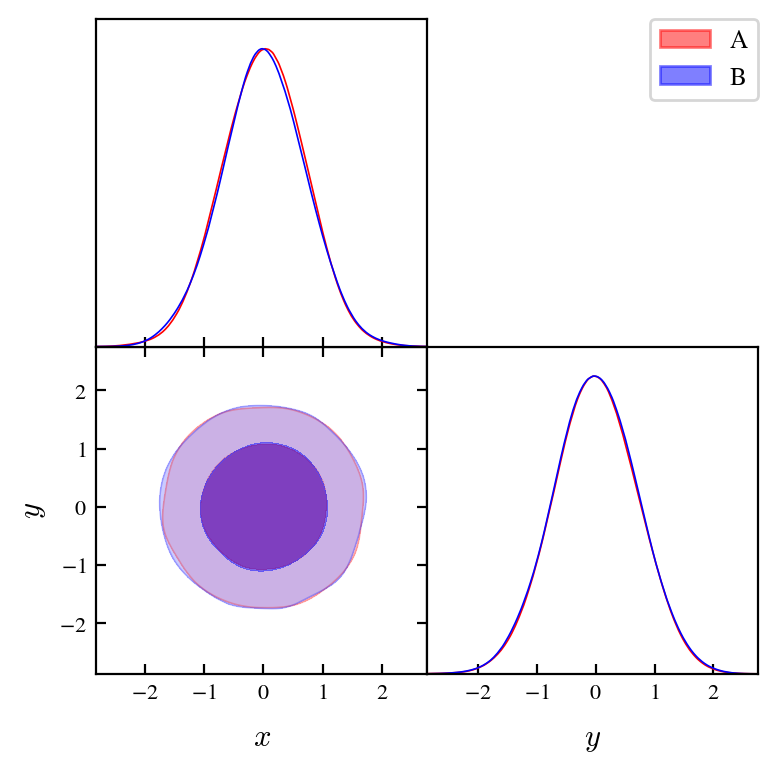

Factor: 1.4142135623730951, PTE: 0.368, N_sigma: 0.9


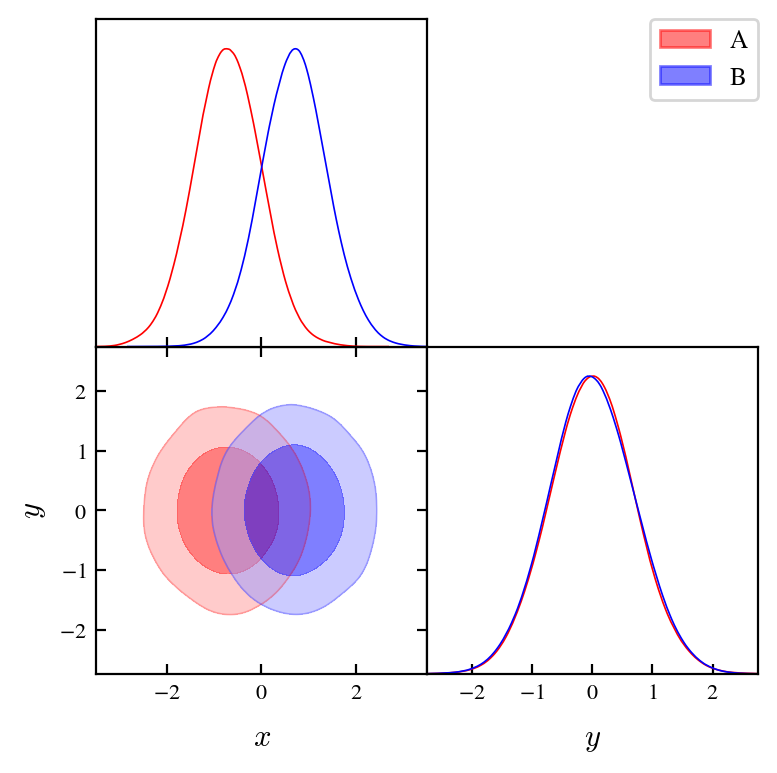

Factor: 2.8284271247461903, PTE: 0.0183, N_sigma: 2.36


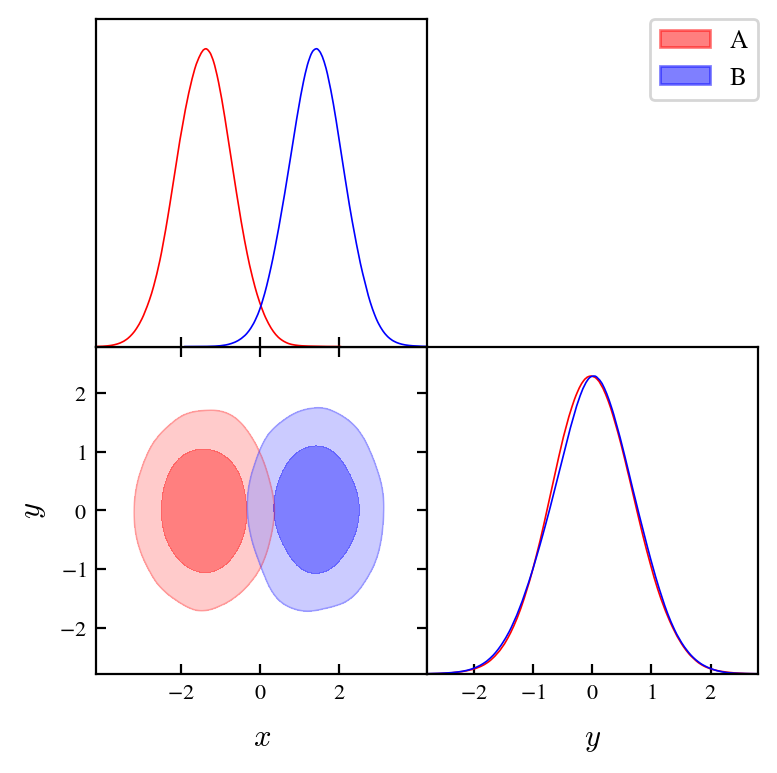

Factor: 4.242640687119287, PTE: 0.000123, N_sigma: 3.84


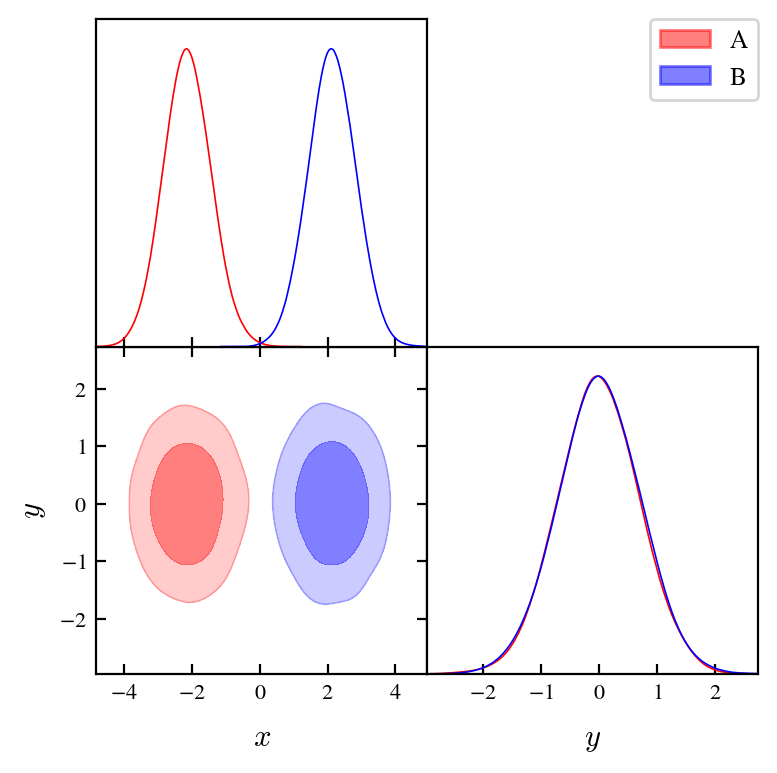

Factor: 5.656854249492375, PTE: 1.13e-07, N_sigma: 5.31


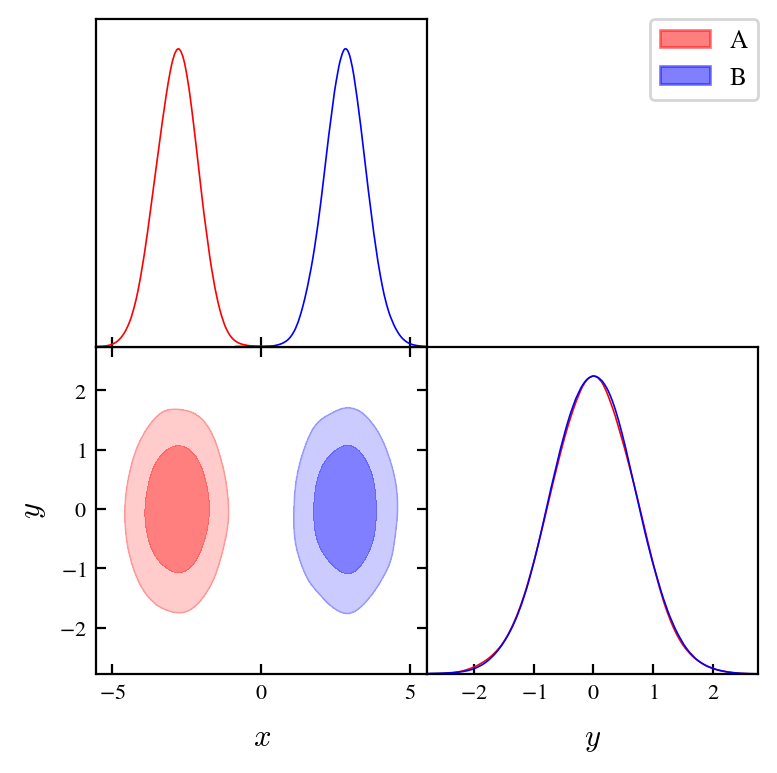

Factor: 7.071067811867373, PTE: 1.39e-11, N_sigma: 6.76


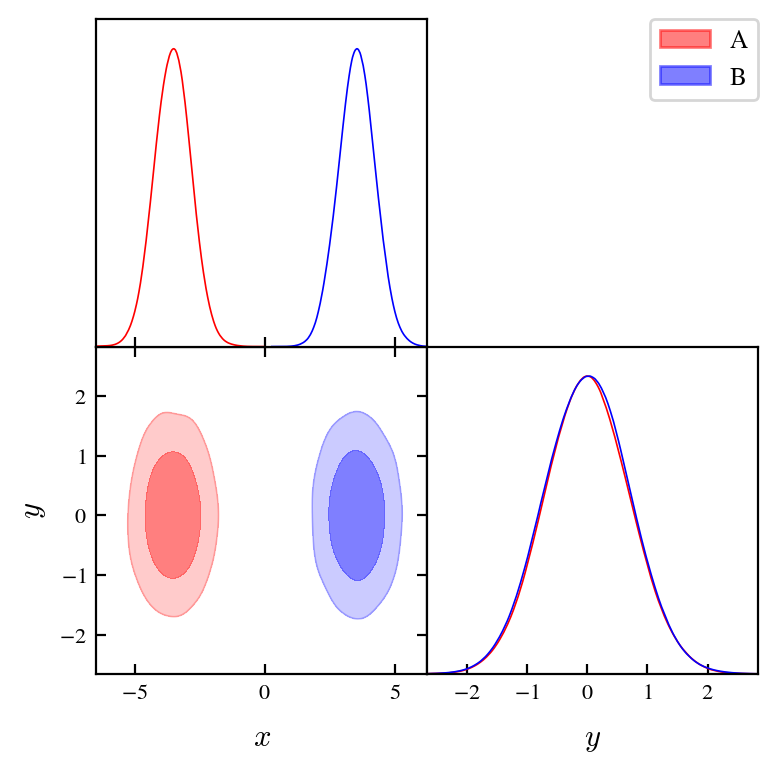

In [7]:
#Sharp triangle

factor = [0., 
          L_iso_from_n(d=2, n=1,gauss_scale='2sigma'),
          L_iso_from_n(d=2, n=2,gauss_scale='2sigma'),
          L_iso_from_n(d=2, n=3,gauss_scale='2sigma'),
          L_iso_from_n(d=2, n=4,gauss_scale='2sigma'),
          L_iso_from_n(d=2, n=5,gauss_scale='2sigma')]


for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.])
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))

    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE = chi2(d).sf(beta_L)
    n_sigma = np.sqrt(2)*erfcinv(PTE)

    print(f"Factor: {factor[i]}, PTE: {PTE:.3g}, N_sigma: {n_sigma:.3g}")


    names = ['x', 'y']
    labels = ['x', 'y']

    lim_x = np.array([-10, 10])
    lim_y = np.array([-10, 10])

    samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
    samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)

    chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
    chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')

    colors = ['red', 'blue', 'green']

    g = plots.get_subplot_plotter()
    g.triangle_plot([chain_A, chain_B],\
                    filled=True, contour_args={'alpha':0.5},\
                    contour_colors=colors,
                    legend_labels=['A', 'B'])
    #g.add_param_markers({'x':[mean_A[0], mean_B[0], mean_C[0]],
    #                    'y':[mean_A[1], mean_B[1], mean_C[1]],
    #                    },)

    #g.export(os.path.join(path_global, 'multidimensional_qdm_tension_vectors_triangle_L_{:.3g}.png'.format(factor[i])))
    plt.show()

# Same L, $N_\sigma^{N_d = 2}, N_\sigma^{N_d = 3}, N_\sigma^{eff}$

In [8]:
from scipy.interpolate import interp1d

factor = np.linspace(0, 8, 100)
n_sigma_arr = np.zeros(len(factor))

for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.])
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))

    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE = chi2(d).sf(beta_L)
    n_sigma_arr[i] = np.sqrt(2)*erfcinv(PTE)

    #print(f"Factor: {factor[i]}, PTE: {PTE:.3g}, N_sigma: {n_sigma:.3g}")


n_sigma_from_factor = interp1d(factor, n_sigma_arr, bounds_error=False, fill_value="extrapolate")

# Example usage
L_test = 4
print(f"For L = {L_test :.3g}, N_sigma_2Nd = {n_sigma_from_factor(L_test) :.3g}")



n_sigma_3Nd_arr = np.zeros(len(factor))

for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.])
    mean_B = factor[i] * np.array([1/2, 0.])
    mean_C = factor[i] * np.array([0., np.sqrt(3)/2.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_C)), (mean_B - mean_C))
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_C + cov_A)), (mean_C - mean_A))
    r_4 = -r_1
    r_5 = -r_2
    r_6 = -r_3

    # Example usage:
    beta_L = np.linalg.norm(np.sum([r_1, r_2, r_3, r_4, r_5, r_6], axis=0))**2

    PTE = gamma(d,1).sf(beta_L)
    n_sigma_3Nd_arr[i] = np.sqrt(2)*erfcinv(PTE)

    #print(f"Factor: {factor[i]}, PTE: {PTE:.3g}, N_sigma: {n_sigma:.3g}")


n_sigma_3Nd_from_factor = interp1d(factor, n_sigma_3Nd_arr, bounds_error=False, fill_value="extrapolate")

# Example usage
L_test = 4
print(f"For L = {L_test :.3g}, N_sigma_3Nd = {n_sigma_3Nd_from_factor(L_test) :.3g}")




# Generate data points for interpolation
N_sigma_eff_values = np.linspace(0.1, 5, 100)
L_values = [L_iso_from_n(d=2, n=n, gauss_scale='1sigma') for n in N_sigma_eff_values]

# Create the interpolation function
N_sigma_from_L = interp1d(L_values, N_sigma_eff_values, bounds_error=False, fill_value="extrapolate")



For L = 4, N_sigma_2Nd = 3.59
For L = 4, N_sigma_3Nd = 0


In [9]:
import numpy as np
from scipy.special import erfcinv
from scipy.stats import chi2, multivariate_normal, gamma
from scipy.special import erfcinv, erfinv, erf, erfc
from scipy.linalg import sqrtm, inv, norm
from scipy.interpolate import interp1d


from math import sqrt

def n_eff_to_L_iso(n: float, d: int = 2, sigma2: float = 0.5, gauss_scale: str = '1sigma') -> float:
    """
    Distancia euclídea L entre las medias de dos Gaussianas D-dimensionales
    idénticas e isotrópicas (Sigma = sigma2 * I), tal que sus contornos 
    que en 1D corresponden a ±nσ se 'toquen'.

    Parámetros
    ----------
    d : int
        Dimensión (D).
    n : float
        'Número de sigmas' 1D (es decir, p = erf(n / sqrt(2))).
    sigma2 : float, opcional
        Varianza isotrópica por eje (default 0.5).

    Devuelve
    --------
    L : float
        Distancia euclídea entre medias.
    """


    if gauss_scale == '1sigma':
        # Probabilidad 1D asociada a ±nσ
        p = erf(n / sqrt(2.0)) #is the same, less general
        #p = chi2.cdf(n**2, df=1)  # Cumulative distribution function for chi2Q
    elif gauss_scale == '2sigma':
        p = chi2.cdf(n**2, df=2)  # Cumulative distribution function for chi2

    # Cuantil chi-cuadrado con d grados de libertad
    m2 = chi2.ppf(p, df=d)              # m^2 = χ²_{d,p}
    m  = sqrt(m2)
    # En isotrópico: L = 2 * σ * m, con σ = sqrt(sigma2)
    return 2.0 * sqrt(sigma2) * m




def L_iso_to_n_eff(L: float, d: int = 2, sigma2: float = 0.5, gauss_scale: str = '1sigma') -> float:
    """
    Distancia euclídea L entre las medias de dos Gaussianas D-dimensionales
    idénticas e isotrópicas (Sigma = sigma2 * I), tal que sus contornos 
    que en 1D corresponden a ±nσ se 'toquen'.

    Parámetros
    ----------
    d : int
        Dimensión (D).
    n : float
        'Número de sigmas' 1D (es decir, p = erf(n / sqrt(2))).
    sigma2 : float, opcional
        Varianza isotrópica por eje (default 0.5).

    Devuelve
    --------
    L : float
        Distancia euclídea entre medias.
    """
    factor = np.linspace(0, 8, 100)
    n_eff_to_L_iso_values = np.array([n_eff_to_L_iso(d=d, n=f, sigma2=sigma2, gauss_scale=gauss_scale) for f in factor])
    aux = interp1d(n_eff_to_L_iso_values, factor, bounds_error=False, fill_value="extrapolate")
    return aux(L)


def PTE_to_n_sigma(PTE: float) -> float:
    return np.sqrt(2)*erfcinv(PTE)

def n_sigma_to_PTE(n_sigma: float) -> float:
    return erfc(n_sigma/np.sqrt(2))



def PTE_to_L(PTE: float, Nd: int, d: int = 2, sigma2: float = 0.5) -> float:
    factor = np.linspace(0, 8, 100)
    PTE_arr = np.zeros(len(factor))

    if Nd == 2:
        for i in range(len(factor)):
            mean_A = factor[i] * np.array([-1/2., 0.])
            mean_B = factor[i] * np.array([1/2, 0.])

            cov_A = sigma2 * np.eye(d)
            cov_B = cov_A.copy()
            cov_C = cov_A.copy()

            r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))

            # Example usage:
            beta_L = np.linalg.norm(r_1)**2
            PTE_arr[i] = chi2(d).sf(beta_L)
        return interp1d(PTE_arr, factor, bounds_error=False, fill_value="extrapolate")(PTE)


    elif Nd == 3:
        for i in range(len(factor)):
            mean_A = factor[i] * np.array([-1/2, 0.])
            mean_B = factor[i] * np.array([1/2, 0.])
            mean_C = factor[i] * np.array([0., sqrt(3)/2])

            cov_A = np.eye(d) / 2
            cov_B = cov_A.copy()
            cov_C = cov_A.copy()


            r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
            r_2 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_C)), (mean_A - mean_C))
            r_3 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_C)), (mean_B - mean_C))
            
            beta_L = (np.linalg.norm(r_1)**2 + np.linalg.norm(r_2)**2 + np.linalg.norm(r_3)**2)/3
            PTE_arr[i] = gamma(a=d,scale=1).sf(beta_L)
        return interp1d(PTE_arr, factor, bounds_error=False, fill_value="extrapolate")(PTE)
    
    else:
        print('Invalid number of distributions!')
        pass


def L_to_PTE(L: float, Nd: int, d: int = 2, sigma2: float = 0.5) -> float:
    PTE_arr = np.logspace(-25, 0, 100)
    L_arr = np.zeros(len(PTE_arr))

    for i, PTE in enumerate(PTE_arr):
        L_arr[i] = PTE_to_L(PTE, Nd=Nd, d=d, sigma2=sigma2)
    
    return interp1d(L_arr, PTE_arr, bounds_error=False, fill_value="extrapolate")(L)

In [10]:
N_sigma = 2.3
PTE = n_sigma_to_PTE(N_sigma)
L_0 = PTE_to_L(PTE, Nd=2, d=2)
print('L:{:.3g}'.format(L_0))
print('N_eff: {:.3g}'.format(L_iso_to_n_eff(L_0, d=2, gauss_scale='1sigma')))

L:2.77
N_eff: 1.45


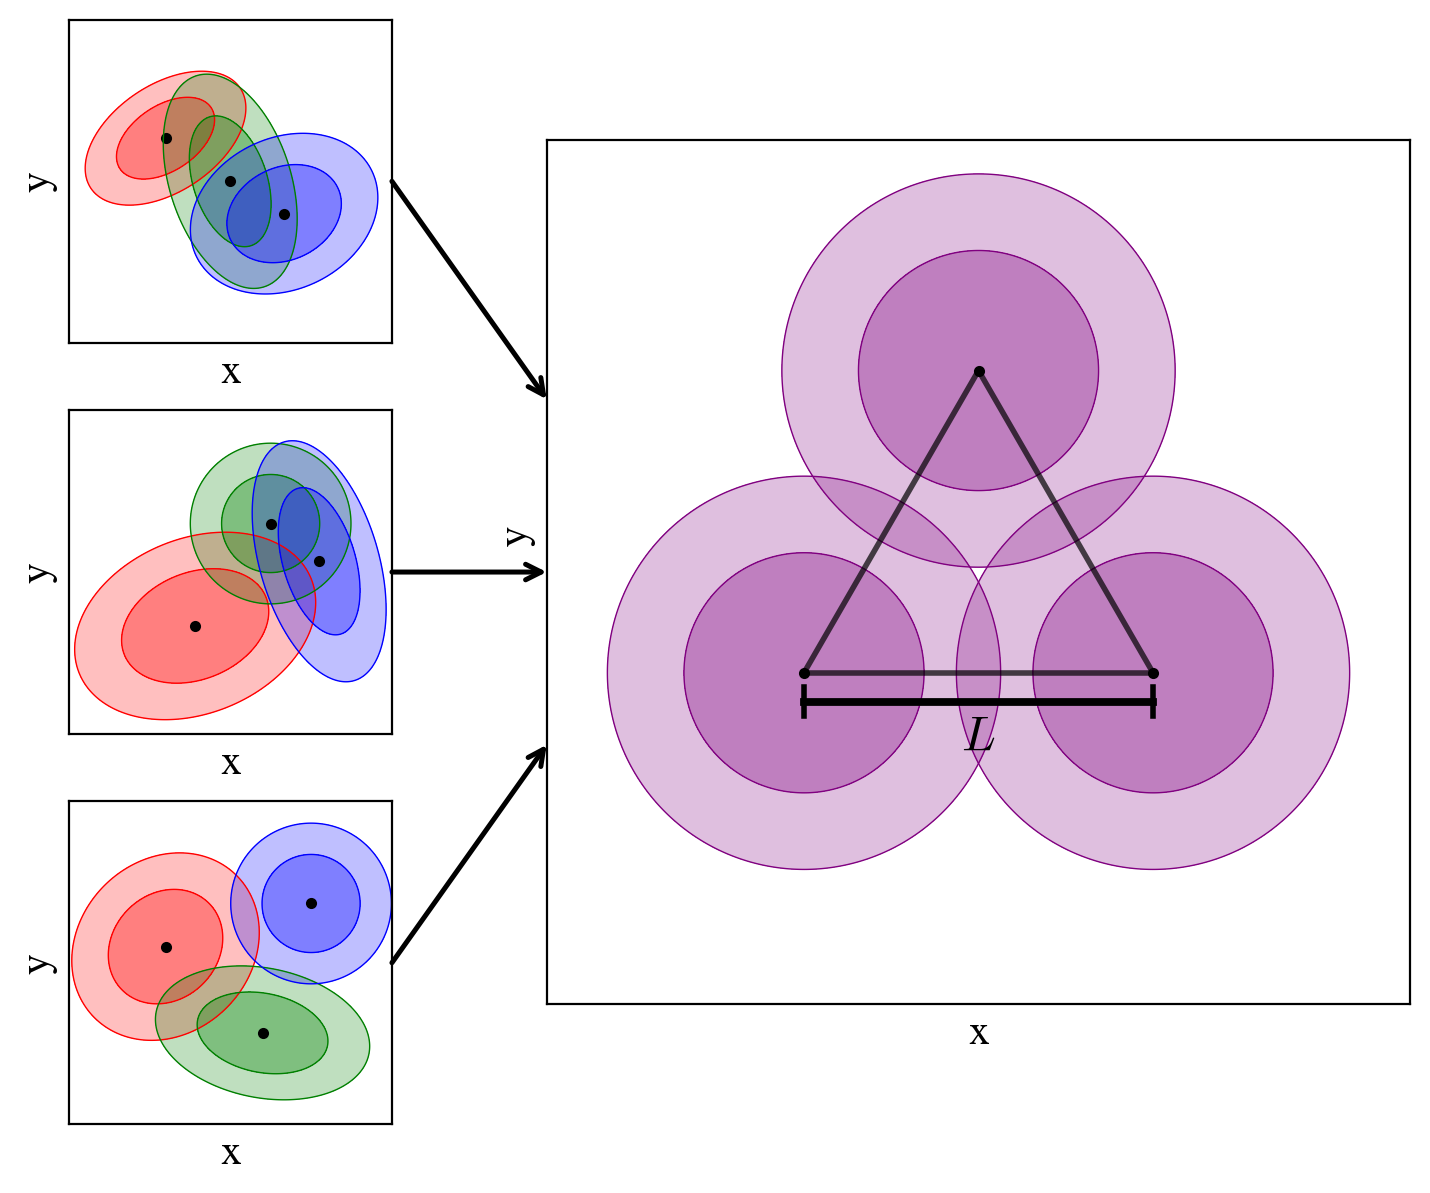

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ConnectionPatch

# -------------------------------
# Utilidades
# -------------------------------
def gaussian_2d_pdf(X, Y, mean, cov):
    """Densidad de una Gaussiana 2D en los puntos (X,Y)."""
    mu = np.asarray(mean).reshape(2, 1)
    Sigma = np.asarray(cov)
    inv = np.linalg.inv(Sigma)
    det = np.linalg.det(Sigma)
    XY = np.vstack([X.ravel(), Y.ravel()])
    d2 = np.sum((XY - mu).T @ inv * (XY - mu).T, axis=1)  # Mahalanobis^2
    Z = np.exp(-0.5 * d2) / (2 * np.pi * np.sqrt(det))
    return Z.reshape(X.shape)
def plot_gaussians(ax, means, covs, extent=(-3, 3, -3, 3), show_means=True, base_color='C0'):
    """
    Dibuja las regiones 68% y 95% CL rellenas con distintas transparencias.
    - 68%: menos transparente (alpha mayor)
    - 95%: más transparente
    """
    x_min, x_max, y_min, y_max = *extent[:2], *extent[2:]
    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(x, y, indexing='xy')
    XY = np.stack([X, Y], axis=-1)

    # Niveles Δχ² (2 parámetros → elípticos)
    chi2_levels = [0.0, 2.30, 6.17]

    # Colores (puede ser una lista de color base o un colormap)
    color = plt.get_cmap('tab10')(0) if base_color == 'C0' else base_color

    for m, C in zip(means, covs):
        m = np.asarray(m)
        C = np.asarray(C)
        Ci = np.linalg.inv(C)
        d = XY - m
        r2 = d[..., 0]*(Ci[0,0]*d[...,0] + Ci[0,1]*d[...,1]) + d[...,1]*(Ci[1,0]*d[...,0] + Ci[1,1]*d[...,1])

        # --- Regiones rellenas ---
        # 95% (más transparente)
        ax.contourf(X, Y, r2, levels=[chi2_levels[1], chi2_levels[2]], colors=[color], alpha=0.25)
        # 68% (menos transparente)
        ax.contourf(X, Y, r2, levels=[chi2_levels[0], chi2_levels[1]], colors=[color], alpha=0.5)

        # --- Contornos de línea ---
        ax.contour(X, Y, r2, levels=chi2_levels[1:], colors=color, linewidths=0.5, linestyles=('solid', 'solid'))

        # --- Media ---
        if show_means:
            ax.plot(m[0], m[1], marker='o', ms=3, color='k')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks([]); ax.set_yticks([])



# -------------------------------
# Parámetros (edita libremente)
# -------------------------------

# Izquierda: tres paneles, cada uno con 3 gaussianas (medias y covarianzas arbitrarias)
left_panels = [
    dict(
        means=[(-1.2,  0.8), (0.0, 0.0), (1.0, -0.6)],
        covs=[
            [[0.6**2,  0.45*0.6*0.5], [0.45*0.6*0.5, 0.5**2]],  # correlación positiva
            [[0.5**2, -0.35*0.5*0.8], [-0.35*0.5*0.8, 0.8**2]], # correlación negativa
            [[0.7**2,  0.20*0.7*0.6], [0.20*0.7*0.6, 0.6**2]],
        ],
        extent=(-3, 3, -3, 3)
    ),
    dict(
        means=[(-0.65, -1.0), (0.75, 0.9), (1.65, 0.2)],
        covs=[
            [[0.9**2,  0.25*0.9*0.7], [0.25*0.9*0.7, 0.7**2]],
            [[0.6**2,  0.00], [0.00, 0.6**2]],                 # casi isotrópica
            [[0.5**2, -0.40*0.5*0.9], [-0.40*0.5*0.9, 0.9**2]],
        ],
        extent=(-3, 3, -3, 3)
    ),
    dict(
        means=[(-1.2, 0.3), (0.6, -1.3), (1.5, 1.1)],
        covs=[
            [[0.7**2,  0.15*0.7*0.7], [0.15*0.7*0.7, 0.7**2]],
            [[0.8**2, -0.20*0.8*0.5], [-0.20*0.8*0.5, 0.5**2]],
            [[0.6**2,  0.00], [0.00, 0.6**2]],
        ],
        extent=(-3, 3, -3, 3)
    ),
]

# Derecha: 3 gaussianas no correlacionadas con medias en triángulo equilátero
triangle_center = np.array([0.0, 0.0])
triangle_radius = 1.4
# vértices de un triángulo equilátero (ángulos 90°, 210°, 330° por estética)
angles = np.deg2rad([90, 210, 330])
right_means = [
    (triangle_center + triangle_radius * np.array([np.cos(a), np.sin(a)])).tolist()
    for a in angles
]
right_cov = [[0.55**2, 0.0], [0.0, 0.55**2]]  # sin correlación
right_covs = [right_cov, right_cov, right_cov]
right_extent = (-3, 3, -3, 3)

# Mapeo de flechas: conecta panel i (0,1,2) con media i del triángulo
# Tomamos como punto de partida la media "central" (índice 1) en cada panel izquierdo
source_index_in_left_panel = 1  # puedes cambiarlo a 0 o 2 si prefieres
target_indices_right = [0, 1, 2]  # correspondencia 1–a–1 con vértices del triángulo

# -------------------------------
# Figura y ejes
# -------------------------------
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(nrows=3, ncols=2, width_ratios=[1.0, 1.15], height_ratios=[1, 1, 1], figure=fig)

axes_left = [fig.add_subplot(gs[i, 0]) for i in range(3)]
ax_right  = fig.add_subplot(gs[:, 1])  # ocupa las 3 filas de la segunda columna

# -------------------------------
# Dibujar paneles izquierdos
# -------------------------------
left_means_for_arrows = []  # guardamos las medias escogidas para flechas

#colors = ['C0', 'C1', 'C2']
colors = ['red', 'green', 'blue']              # ejemplo
for ax, panel in zip(axes_left, left_panels):
    # dibuja cada gaussiana con un color distinto
    for (m, C, col) in zip(panel["means"], panel["covs"], colors):
        plot_gaussians(ax, [m], [C], extent=panel["extent"], base_color=col)
    ax.set_xlabel('x', size=15)
    ax.set_ylabel('y', size=15)

# -------------------------------
# Dibujar panel derecho (triángulo)
# -------------------------------
plot_gaussians(ax_right, means=right_means, covs=right_covs, extent=right_extent, base_color='purple')

# Opcional: dibujar el triángulo de las medias (solo segmentitos finos)
ax_right.plot([right_means[0][0], right_means[1][0]], [right_means[0][1], right_means[1][1]], lw=2, color='black', alpha=0.7)
ax_right.plot([right_means[1][0], right_means[2][0]], [right_means[1][1], right_means[2][1]], lw=2, color='black', alpha=0.7)
ax_right.plot([right_means[2][0], right_means[0][0]], [right_means[2][1], right_means[0][1]], lw=2, color='black', alpha=0.7)
ax_right.set_xlabel('x', size=15)
ax_right.set_ylabel('       y', size=15)


# --- Lado inferior como "regla" de longitud L ---
x1, y1 = right_means[1]  # vértice inferior izquierdo
x2, y2 = right_means[2]  # vértice inferior derecho

# línea base más gruesa
ax_right.plot(
    [x1, x2], [y1 - 0.2, y2 - 0.2],
    lw=2.8, color='black'
)

# marquitas verticales en los extremos (tipo regla)
tick =0.2  # longitud de las marcas (ajustable)
ax_right.plot([x1, x1], [y1-0.1, y1-0.1 - tick], lw=2, color='black')
ax_right.plot([x2, x2], [y2-0.1, y2-0.1 - tick], lw=2, color='black')

# etiqueta "L" en el centro del lado inferior
x_L = 0.5 * (x1 + x2)
y_L = y1 - 0.3  # desplazamiento hacia abajo (ajustable)
ax_right.text(
    x_L, y_L, r'$L$',
    fontsize=18, ha='center', va='top'
)

ax_right.set_aspect('equal', adjustable='box')
ax_right.set_xticks([])
ax_right.set_yticks([])



y_targets = [0.7, 0.5, 0.3]
for axL, yA in zip(axes_left, y_targets):
    con = ConnectionPatch(
        xyA=(1.0, 0.5), coordsA=axL.transAxes,
        xyB=(0.0, yA), coordsB=ax_right.transAxes,
        arrowstyle="->", lw=1.8, mutation_scale=14, clip_on=False
    )
    fig.add_artist(con)


# -------------------------------
# Ajuste final y export
# -------------------------------
plt.tight_layout(pad=0.8, w_pad=0.6, h_pad=0.6)
os.chdir(os.path.join(path_global,'multimeter','notebooks','PRL','paper_plots','figures'))
fig.savefig("mapping.svg", bbox_inches="tight")
fig.savefig('mapping.pdf', bbox_inches="tight")
fig.savefig('mapping.png', bbox_inches="tight", dpi=300)
plt.show()

In [12]:
colors = ['red', 'green', 'blue'] 
print(colors)

color_hex = [matplotlib.colors.to_hex(color) for color in colors]
print(color_hex)

['red', 'green', 'blue']
['#ff0000', '#008000', '#0000ff']
